In [ ]:
%tensorflow_version 1.x
# %pip uninstall h5py #(only first time)
%pip install h5py==2.10.0
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.applications import MobileNetV2
from keras.datasets import cifar10
from sklearn.metrics import classification_report

import cv2

import sys
import numpy as np
import csv
import math

import matplotlib.pyplot as plt

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
#testing the GPU
device_name = tf.test.gpu_device_name()
# print(device_name)
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Import Dataset

In [ ]:
# Class names for different classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print ('Training data seize:', train_images.shape, 'Test data size', test_images.shape)

# Normalize pixel values between -1 and 1
train_images = train_images / 127.5 - 1 
test_images = test_images / 127.5 - 1 

Training data seize: (50000, 32, 32, 3) Test data size (10000, 32, 32, 3)


### Visualize dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

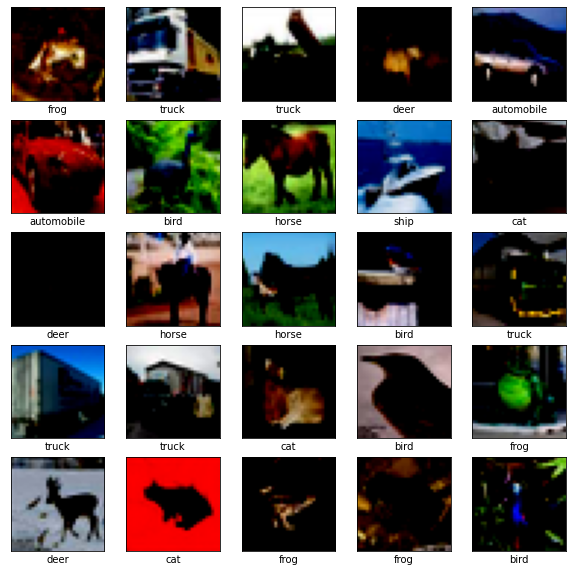

In [ ]:
%matplotlib inline
#Show first 25 training images below
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

### Resize images for use with MobileNetV2

In [ ]:
# Upsize all training and testing images to 96x96 for use with mobile net
minSize = 96 #minimum size requried for mobileNetV2
# You may use cv2 package. Look for function:
#"cv2.resize(<originalImage>, dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)"
# resize train image: You can first initialize a numpy array resized_train_images to store all the resized training images
resized_train_images = np.zeros((50000, minSize, minSize, 3), dtype=np.float32)
# <Write code for resizing>
 
# resize test image: You can first initialize a numpy array resized_test_images to store all the resized test images
resized_test_images = np.zeros((10000, minSize, minSize, 3), dtype=np.float32)

# <Write code for resizing>

In [ ]:
#loop through both train and test images and add them to the resized images array
for pic in range(len(train_images)):
  resized_train_images[pic] = cv2.resize(train_images[pic], dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)

for pic in range(len(test_images)):
  resized_test_images[pic] = cv2.resize(test_images[pic], dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

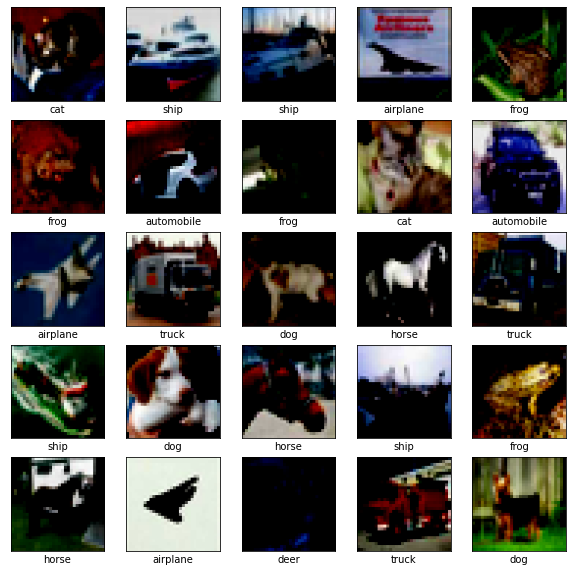

In [ ]:
#Show first 25 test images below
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resized_test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])

In [ ]:
print(resized_train_images.shape)

(50000, 96, 96, 3)


In [ ]:
#check the rgb value of a specific pixel of an image
for i in resized_train_images[40000][50][50]:
  print(i)

0.92156863
0.99215686
0.94509804


### Download MobileNetV2 model



In [ ]:
#<Write code for downloading MobileNetV2>

#input shape 96x96x3 and include top to have the fc layer
model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(96,96,3), include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
#preview of model
model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

### Add custom layers at the end of downloaded model

In [ ]:
#drop the final layer of the pre-designed model

#get the 2nd last layer for the new layers to be connected to
penultimate_layer = model.layers[-2]

#create new hidden layers with 256, 128 nodes with activation function relu
new_layer = tf.keras.layers.Dense(256, activation=tf.nn.relu)(penultimate_layer.output)
new_layer2 = tf.keras.layers.Dense(128, activation=tf.nn.relu)(new_layer)

#create 1 final output layer with 10 nodes to represent 10 classes, with activation function softmax
outputs = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(new_layer2)

final_model = tf.keras.models.Model(model.input, outputs)

#preview new model
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [ ]:
#check output of final layer
layer_output_check = final_model.layers[-1].output.shape

print(layer_output_check)

(?, 10)


### Add loss function, compile and train the model, and check accuracy on test data

In [ ]:
#adding validation data

val_image = resized_train_images[-10000:]
val_label = train_labels[-10000:]

#only run this once
resized_train_images = resized_train_images[:-10000]
train_labels = train_labels[:-10000]

In [ ]:
print(len(resized_train_images))

40000


In [25]:
#<Write code>

#compile model
#loss function selected is sparse categorical crossentropy as this model is for image classification with multiple classes
final_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Run the stochastic gradient descent with 32 batch size
epochs = 10
batch_size = 32
history_batch_32 = final_model.fit(resized_train_images, train_labels, batch_size=batch_size,
                                   epochs=epochs, validation_data=(val_image, val_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 138s 3ms/sample - loss: 0.7160 - acc: 0.7701 - val_loss: 4.5493 - val_acc: 0.2426
Epoch 2/10
40000/40000 [==============================] - 129s 3ms/sample - loss: 0.4857 - acc: 0.8405 - val_loss: 1.9229 - val_acc: 0.5212
Epoch 3/10
40000/40000 [==============================] - 129s 3ms/sample - loss: 0.4083 - acc: 0.8645 - val_loss: 2.1646 - val_acc: 0.6281
Epoch 4/10
40000/40000 [==============================] - 130s 3ms/sample - loss: 0.3513 - acc: 0.8822 - val_loss: 1.5020 - val_acc: 0.6488
Epoch 5/10
40000/40000 [==============================] - 129s 3ms/sample - loss: 0.3103 - acc: 0.8983 - val_loss: 2.3964 - val_acc: 0.5907
Epoch 6/10
40000/40000 [==============================] - 129s 3ms/sample - loss: 0.2721 - acc: 0.9086 - val_loss: 1.4105 - val_acc: 0.6867
Epoch 7/10
40000/40000 [==============================] - 129s 3ms/sample - loss: 0.2439 - acc: 0.9187 - val_l

In [ ]:
#get the accuracy on the testing data with batch size 32
test_loss, test_acc = final_model.evaluate(resized_test_images, test_labels)

10000/10000 [==============================] - 8s 800us/sample - loss: 1.1507 - acc: 0.7276


In [22]:
# Run the stochastic gradient descent with 128 batch size, 10 epochs
epochs = 10
batch_size = 128
history_batch_128 = final_model.fit(resized_train_images, train_labels, batch_size=batch_size,
                                   epochs=epochs, validation_data=(val_image, val_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 0.0483 - acc: 0.9837 - val_loss: 0.6387 - val_acc: 0.8627
Epoch 2/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.0130 - acc: 0.9963 - val_loss: 0.5540 - val_acc: 0.8959
Epoch 3/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.0116 - acc: 0.9960 - val_loss: 0.4922 - val_acc: 0.9067
Epoch 4/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.0151 - acc: 0.9948 - val_loss: 0.6417 - val_acc: 0.8802
Epoch 5/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.0185 - acc: 0.9941 - val_loss: 0.7999 - val_acc: 0.8616
Epoch 6/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.0181 - acc: 0.9937 - val_loss: 0.7487 - val_acc: 0.8586
Epoch 7/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.0180 - acc: 0.9944 - val_loss: 0.

In [23]:
#get the accuracy on the testing data with batch size 128 and 10 epochs, after model has been trained with batch size 16 and 10 epochs
test_loss, test_acc = final_model.evaluate(resized_test_images, test_labels)

10000/10000 [==============================] - 12s 1ms/sample - loss: 0.6561 - acc: 0.8747


In [48]:
#re-create final model to reset the weights 

penultimate_layer = model.layers[-2]

#create new hidden layers with 256, 128 nodes with activation function relu
new_layer = tf.keras.layers.Dense(256, activation=tf.nn.relu)(penultimate_layer.output)
new_layer2 = tf.keras.layers.Dense(128, activation=tf.nn.relu)(new_layer)

#create 1 final output layer with 10 nodes to represent 10 classes, with activation function softmax
outputs = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(new_layer2)

final_model_new = tf.keras.models.Model(model.input, outputs)

# preview new model
# final_model_v2.summary()

In [49]:
final_model_new.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Run the stochastic gradient descent with 32 batch size and 7 epochs
epochs = 7
batch_size = 32
history_batch_32 = final_model_new.fit(resized_train_images, train_labels, batch_size=batch_size,
                                   epochs=epochs, validation_data=(val_image, val_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/7
40000/40000 [==============================] - 146s 4ms/sample - loss: 0.1753 - acc: 0.9475 - val_loss: 1.3157 - val_acc: 0.7589
Epoch 2/7
40000/40000 [==============================] - 137s 3ms/sample - loss: 0.1323 - acc: 0.9588 - val_loss: 0.6065 - val_acc: 0.8612
Epoch 3/7
40000/40000 [==============================] - 136s 3ms/sample - loss: 0.1177 - acc: 0.9624 - val_loss: 0.6365 - val_acc: 0.8642
Epoch 4/7
40000/40000 [==============================] - 137s 3ms/sample - loss: 0.1059 - acc: 0.9650 - val_loss: 0.6709 - val_acc: 0.8286
Epoch 5/7
40000/40000 [==============================] - 136s 3ms/sample - loss: 0.0945 - acc: 0.9691 - val_loss: 0.5901 - val_acc: 0.8622
Epoch 6/7
40000/40000 [==============================] - 136s 3ms/sample - loss: 0.0931 - acc: 0.9695 - val_loss: 0.6939 - val_acc: 0.8481
Epoch 7/7
40000/40000 [==============================] - 136s 3ms/sample - loss: 0.0835 - acc: 0.9724 - val_loss: 0.

In [51]:
# Afterwards, train the model again with 128 batch size and 3 epochs
epochs = 3
batch_size = 128
history_batch_128 = final_model_new.fit(resized_train_images, train_labels, batch_size=batch_size,
                                   epochs=epochs, validation_data=(val_image, val_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 99s 2ms/sample - loss: 0.0181 - acc: 0.9938 - val_loss: 0.7321 - val_acc: 0.8728
Epoch 2/3
40000/40000 [==============================] - 99s 2ms/sample - loss: 0.0026 - acc: 0.9993 - val_loss: 0.6453 - val_acc: 0.8998
Epoch 3/3
40000/40000 [==============================] - 99s 2ms/sample - loss: 0.0016 - acc: 0.9996 - val_loss: 0.6232 - val_acc: 0.9039


In [54]:
#get acc with retrained model 
test_loss, test_acc = final_model_new.evaluate(resized_test_images, test_labels)

10000/10000 [==============================] - 9s 936us/sample - loss: 0.6436 - acc: 0.9019


In [52]:
# Get all predictions for test data
predictions = final_model_new.predict(resized_test_images)
predictions.shape

(10000, 10)

In [55]:
#get more detailed breakdowns of accuracy, precision, recall and f1-score for the predictions
predicted_label = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_label))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1000
           1       0.93      0.98      0.95      1000
           2       0.89      0.85      0.87      1000
           3       0.72      0.87      0.79      1000
           4       0.93      0.89      0.91      1000
           5       0.84      0.85      0.85      1000
           6       0.93      0.93      0.93      1000
           7       0.96      0.92      0.94      1000
           8       0.95      0.94      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



### Extra code for producing different plots

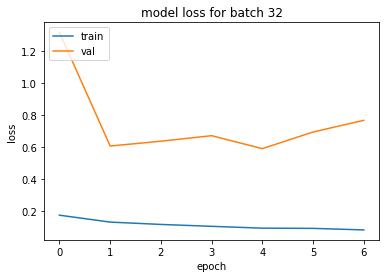

In [56]:
#plot graph of loss against epoch
history = history_batch_32
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch 32')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

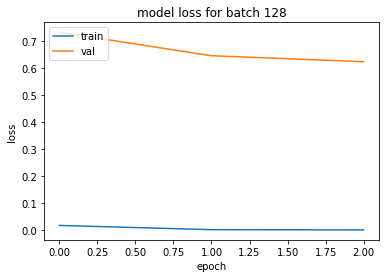

In [57]:
#plot graph of loss against epoch
history = history_batch_128

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for batch 128')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()